In [122]:
# 2 main Data Structures of Pandas:
# Series and DataFrames


# 1.Series -- has index similar to hashmap.

import pandas as pd
myseries = pd.Series([5,6,7,8,9,10])
myseries

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [123]:
#Attributes of Series -- Index and value
print(myseries.index)
print(myseries.values)

RangeIndex(start=0, stop=6, step=1)
[ 5  6  7  8  9 10]


In [124]:
#Providing index (labels) explicitly
myseries2 = pd.Series([5,6,7,8,9,10],index = ['a','b','c','d','e','f'])
myseries2

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64

In [125]:
#retrieve several elements by their indexes or making group assignment
print(myseries2[['a', 'b', 'f']])
print("-"*10)
myseries2[['a', 'b', 'f']] = 0
print(myseries2)

a     5
b     6
f    10
dtype: int64
----------
a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64


In [126]:
#Filtering and math operations 
print(myseries2[myseries2>0])
print("-"*10)
print(myseries2[myseries2>0]*2)

c    7
d    8
e    9
dtype: int64
----------
c    14
d    16
e    18
dtype: int64


In [127]:
#Series is very similar to dictionary, where key is an index and value is an element
#Another form of assignment
myseries3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
print(myseries3)

a    5
b    6
c    7
d    8
dtype: int64


In [128]:
#Series object and its index have name attributes, so you can label them
myseries3.name = 'numbers'
myseries3.index.name = 'letters'
print(myseries3)

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64


In [129]:
#Changing the Index
myseries3.index = ['A', 'B', 'C', 'D']
print(myseries3)

A    5
B    6
C    7
D    8
Name: numbers, dtype: int64


In [130]:
# 2. DataFrames -- Simply said, DataFrame is a table. It has rows and columns. Each column in a DataFrame is a Series object, rows consist of elements inside Series.


In [131]:
df = pd.DataFrame({
...     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
...     'population': [17.04, 143.5, 9.5, 45.5],
...     'square': [2724902, 17125191, 207600, 603628]
... })
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [132]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

In [133]:
df.columns


Index(['country', 'population', 'square'], dtype='object')

In [134]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [135]:
df = pd.DataFrame({
...     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
...     'population': [17.04, 143.5, 9.5, 45.5],
...     'square': [2724902, 17125191, 207600, 603628]
... })
df.index = ['KZ', 'RU', 'BY', 'UA']
df.index.name = 'Country Code'
print(df)
print('-'*20)
df.index

                 country  population    square
Country Code                                  
KZ            Kazakhstan       17.04   2724902
RU                Russia      143.50  17125191
BY               Belarus        9.50    207600
UA               Ukraine       45.50    603628
--------------------


Index(['KZ', 'RU', 'BY', 'UA'], dtype='object', name='Country Code')

In [136]:
#Row access using index can be performed in several ways:

#using .loc and providing index label
#using .iloc and providing index number

print(df.loc['KZ'])
print("-"*10)
print(df.iloc[2])
print("-"*10)

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object
----------
country       Belarus
population        9.5
square         207600
Name: BY, dtype: object
----------


In [137]:
#.loc takes 2 arguments: index list and column list, slicing operation is supported as well:

print(df.loc['KZ':'BY', ['population']])

              population
Country Code            
KZ                 17.04
RU                143.50
BY                  9.50


In [138]:
# Filtering is performed using so-called Boolean arrays
df[df.population > 10][['country', 'square']]
df

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [139]:
#Let’s add new column with population density
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [140]:
# delete a column
del df['density']
df

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [141]:
# renaming a column
#Here Country Code is index so we can't rename it like this
df = df.rename(columns={'Country Code': 'country_code','country':'countries'})
#We have to change the index name
df.index.name='country_code'
df

,countries,population,square
country_code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [142]:
# Reading and Writing
#pandas supports many popular file formats including CSV, XML, HTML etc.

#But usually we use CSV files. For example, if you want to save our previous DataFrame run this:
#df.to_csv('filename.csv')

#For reading data use this:
#df = pd.read_csv('filename.csv', sep=',')

In [143]:
#Aggregating and Grouping in Pandas
#Grouping is probably one of the most popular methods in data analysis. If you want to group data in pandas you have to use .groupby method.
titanic_df = pd.read_csv('titanic.csv')
print(titanic_df.head())

   PassengerID                                           Name PClass    Age  \
0            1                   Allen, Miss Elisabeth Walton    1st  29.00   
1            2                    Allison, Miss Helen Loraine    1st   2.00   
2            3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3            4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4            5                  Allison, Master Hudson Trevor    1st   0.92   

      Sex  Survived  SexCode  
0  female         1        1  
1  female         0        1  
2    male         0        0  
3  female         0        1  
4    male         1        0  


In [144]:
#Let’s calculate how many passengers (women and men) survived and how many did not, we will use .groupby as stated above.

print(titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count())
print('-'*50)
temp=titanic_df.groupby(['Sex','Age'])['PassengerID'].count()
print(temp)

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64
--------------------------------------------------
Sex     Age  
female  0.17      1
        1.00      2
        1.50      2
        2.00      4
        3.00      2
        4.00      4
        5.00      2
        6.00      2
        7.00      1
        8.00      2
        9.00      3
        10.00     2
        11.00     1
        12.00     2
        13.00     1
        14.00     2
        15.00     4
        16.00     6
        17.00     7
        18.00    17
        19.00     9
        20.00     6
        21.00    11
        22.00    15
        23.00     9
        24.00    11
        25.00     5
        26.00     6
        27.00     8
        28.00     7
                 ..
male    37.00     4
        38.00     6
        39.00     9
        40.00     7
        41.00     7
        42.00     9
        43.00     4
        44.00     5
        45

In [145]:
#Now let’s analyze the same data by cabin class:
print(titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count())

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64


In [146]:
#Pivoting tables in pandas
#It is same like groupby(multidimensional) but is more readable and neat
#It takes 4 arguments - index   :
#                     - columns : 
#                     - values  : 
#                     - aggfunc : function used to aggregate(mean,median,max,count,min)
#we will try survived in first 3 arguments arguments

In [147]:
#Survived in index
titanic_df = pd.read_csv('titanic.csv')
pvt = titanic_df.pivot_table(index=['Sex','Survived'], columns=['PClass'], values=['Name'], aggfunc='count')
print(pvt)

                Name                     
PClass             *    1st    2nd    3rd
Sex    Survived                          
female 0         NaN    9.0   13.0  132.0
       1         NaN  134.0   94.0   80.0
male   0         1.0  120.0  147.0  441.0
       1         NaN   59.0   25.0   58.0


In [148]:
#Survived in columns
pvt2= titanic_df.pivot_table(index=['Sex'], columns=['PClass','Survived'], values=['Name'], aggfunc='count')
print(pvt2)

         Name                                        
PClass      *    1st           2nd          3rd      
Survived    0      0      1      0     1      0     1
Sex                                                  
female    NaN    9.0  134.0   13.0  94.0  132.0  80.0
male      1.0  120.0   59.0  147.0  25.0  441.0  58.0


In [149]:
#Survived in values
pvt3= titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values=['Name','Survived'], aggfunc='count')
print(pvt3)

       Name                      Survived                     
PClass    *    1st    2nd    3rd        *    1st    2nd    3rd
Sex                                                           
female  NaN  143.0  107.0  212.0      NaN  143.0  107.0  212.0
male    1.0  179.0  172.0  499.0      1.0  179.0  172.0  499.0


In [150]:
titanic_df.describe()

,PassengerID,Age,Survived,SexCode
count,1313.000000,756.000000,1313.000000,1313.000000
mean,657.000000,30.397989,0.342727,0.351866
std,379.174762,14.259049,0.474802,0.477734
min,1.000000,0.170000,0.000000,0.000000
25%,329.000000,21.000000,0.000000,0.000000
50%,657.000000,28.000000,0.000000,0.000000
75%,985.000000,39.000000,1.000000,1.000000
max,1313.000000,71.000000,1.000000,1.000000


In [151]:
!pip install missingno

In [153]:
import missingno

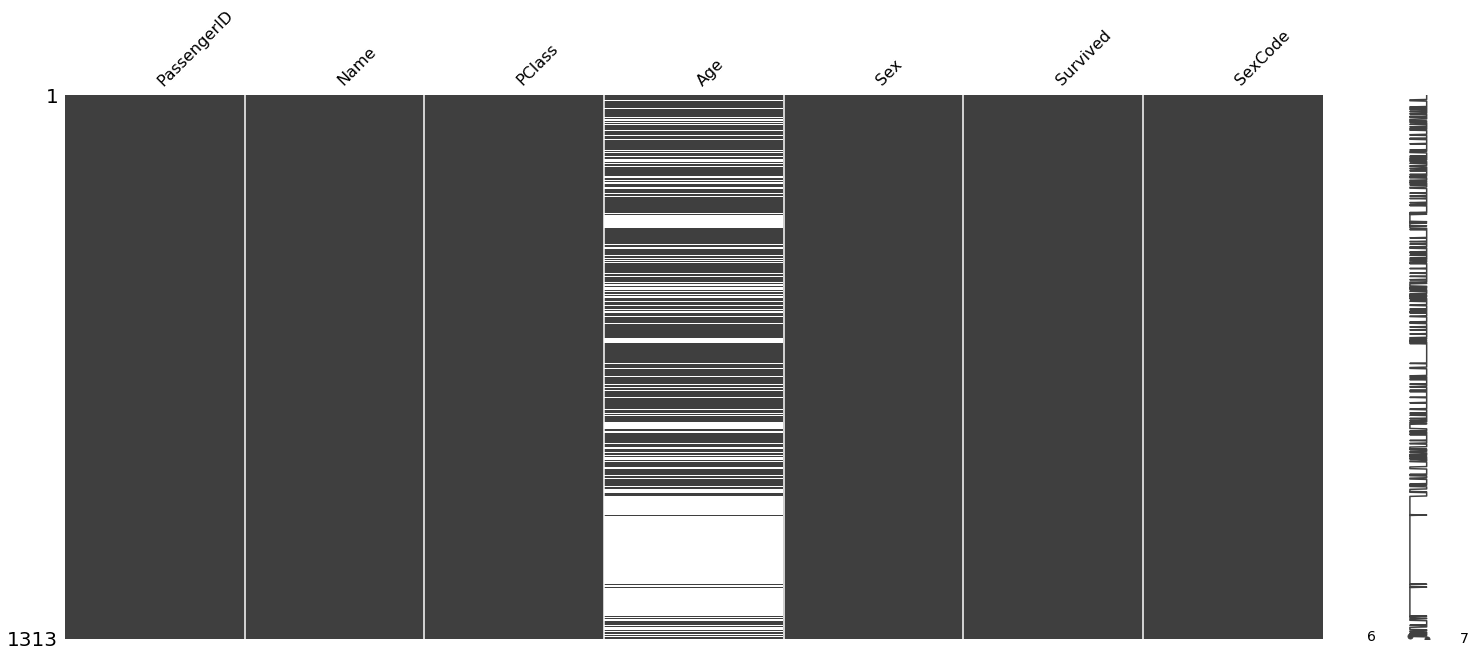

In [154]:
missingno.matrix(titanic_df)

In [155]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
PassengerID    1313 non-null int64
Name           1313 non-null object
PClass         1313 non-null object
Age            756 non-null float64
Sex            1313 non-null object
Survived       1313 non-null int64
SexCode        1313 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


In [157]:
titanic_df.describe(include='all')

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
count,1313.000000,1313,1313,756.000000,1313,1313.000000,1313.000000
unique,NaN,1310,4,NaN,2,NaN,NaN
top,NaN,"Kelly, Mr James",3rd,NaN,male,NaN,NaN
freq,NaN,2,711,NaN,851,NaN,NaN
mean,657.000000,NaN,NaN,30.397989,NaN,0.342727,0.351866
std,379.174762,NaN,NaN,14.259049,NaN,0.474802,0.477734
min,1.000000,NaN,NaN,0.170000,NaN,0.000000,0.000000
25%,329.000000,NaN,NaN,21.000000,NaN,0.000000,0.000000
50%,657.000000,NaN,NaN,28.000000,NaN,0.000000,0.000000
75%,985.000000,NaN,NaN,39.000000,NaN,1.000000,1.000000
